In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn 
print (sklearn.__version__)

1.4.2


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# EDA & Data Understanding

In [5]:
df= pd.read_csv(r'C:\Users\OSAMA AHMED\Desktop\The Final Project For Data Science ( USA Real Estate)\realtor-data.zip.csv')
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [6]:
df.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
# check columns
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [8]:
# drop the columns zip_code and street
df.drop(['zip_code', 'street'], axis = 1, inplace = True)
df.head(5)

,brokered_by,status,price,bed,bath,acre_lot,city,state,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,NaN


In [9]:
# check stsatus values 
df['status'].value_counts()

status
for_sale          1389306
sold               812009
ready_to_build      25067
Name: count, dtype: int64

In [10]:
# check brokered_by values
df['brokered_by'].value_counts()

brokered_by
22611.0    45658
16829.0    27732
53016.0    21709
23592.0     9176
30807.0     8464
           ...  
36774.0        1
88410.0        1
92528.0        1
76894.0        1
98730.0        1
Name: count, Length: 110143, dtype: int64

In [11]:
# check city values
df['city'].value_counts()

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [12]:
# check state values
df['state'].value_counts()

state
Florida                 249432
California              227215
Texas                   208335
New York                103159
North Carolina           85745
Illinois                 85280
Georgia                  80977
Pennsylvania             78373
Arizona                  72825
Virginia                 68763
Washington               62461
Ohio                     59207
New Jersey               48199
Maryland                 46052
Missouri                 45145
Minnesota                43412
Michigan                 42429
Wisconsin                42390
South Carolina           42367
Tennessee                40964
Massachusetts            38041
Oklahoma                 37140
Alabama                  34053
Colorado                 32293
Oregon                   32163
Kentucky                 26316
Louisiana                25815
Arkansas                 23045
Iowa                     23033
New Mexico               21074
Indiana                  18840
Idaho                    16760
Mi

In [13]:
# check the info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   city            object 
 7   state           object 
 8   house_size      float64
 9   prev_sold_date  object 
dtypes: float64(6), object(4)
memory usage: 169.9+ MB


In [14]:
# check shape
df.shape

(2226382, 10)

In [15]:
# check duplicate
df.duplicated().sum()

48005

In [16]:
# check statistics 
df.describe()

,brokered_by,price,bed,bath,acre_lot,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,1.040400e+09


[Text(0.5, 1.0, 'Attacks and subtypes')]

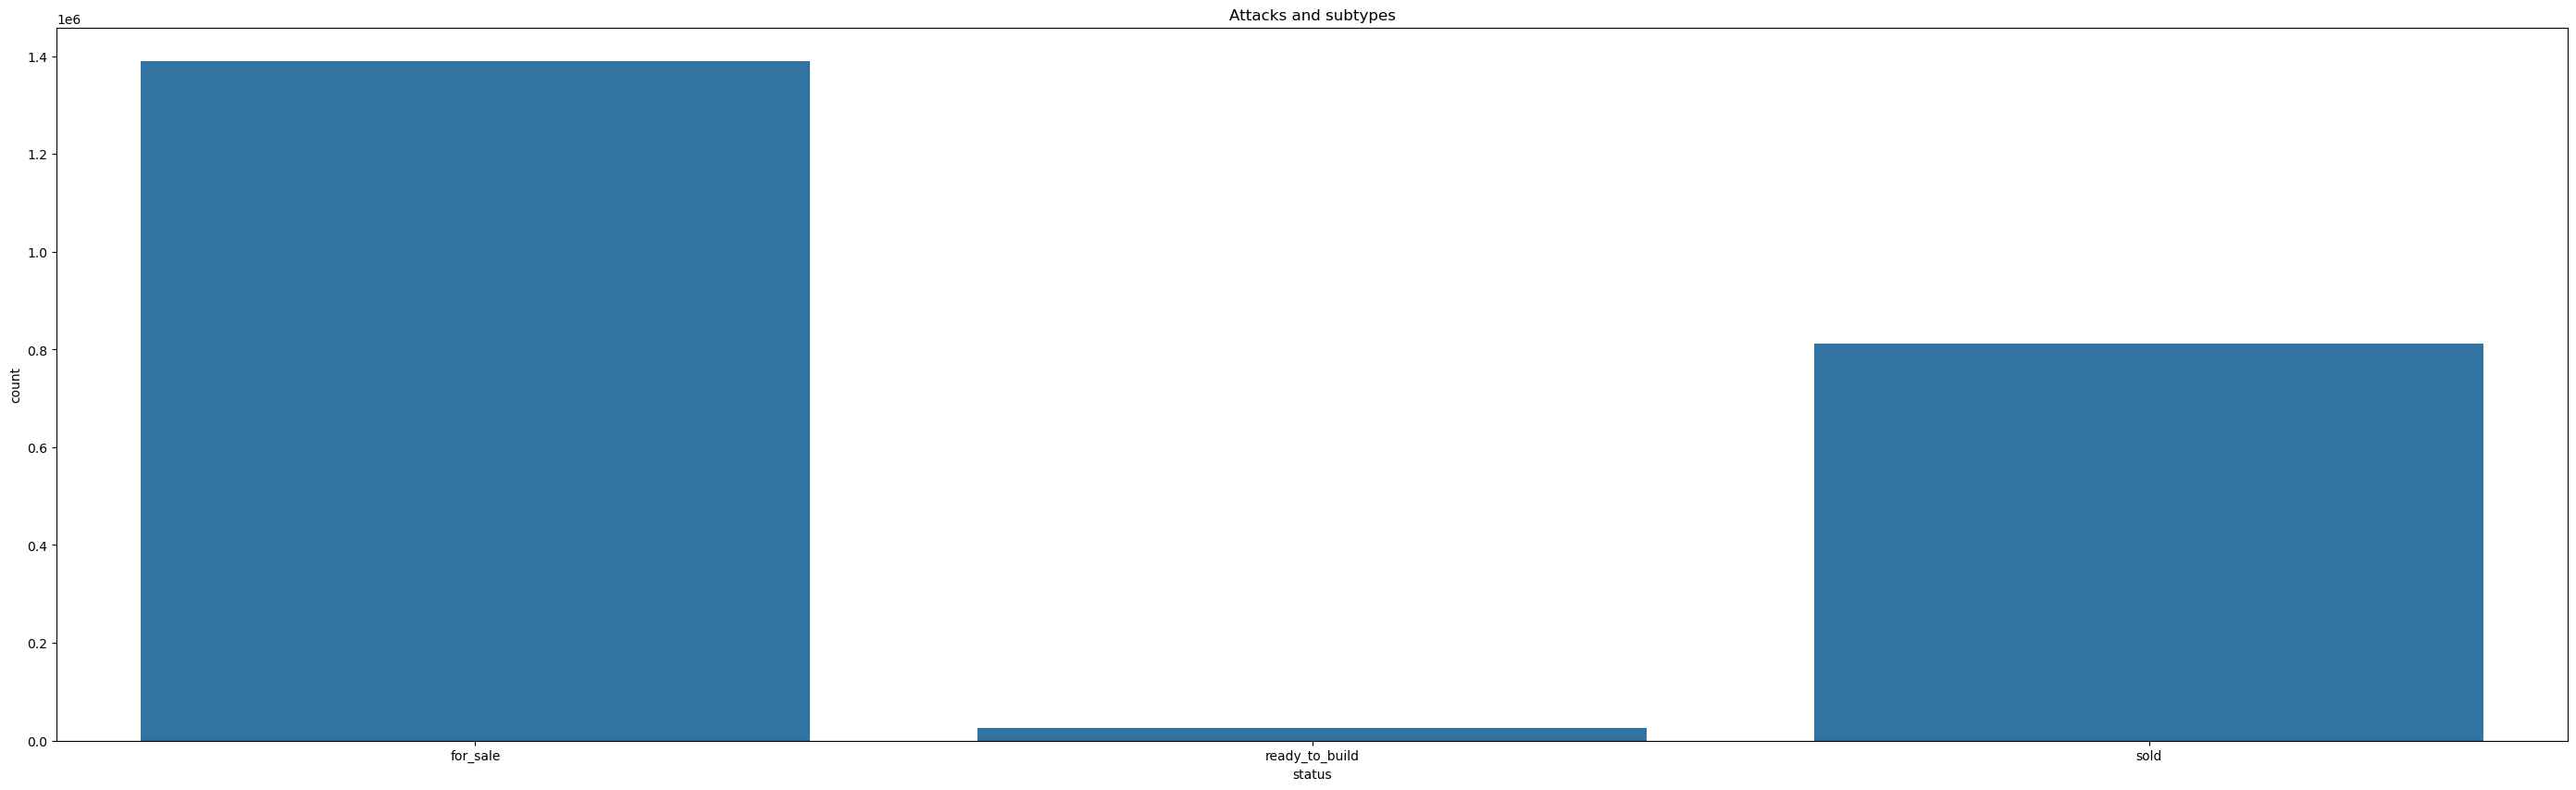

In [17]:
# Set the figure size for better visualization
plt.figure(figsize=(35,10))
# Create a countplot to visualize the distribution of the "status" column
sns.countplot(x=df['status']).set(title='Attacks and subtypes')

In [18]:
# Get the unique values in the 'status' column
df['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

# The Data Preprocessing 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   city            object 
 7   state           object 
 8   house_size      float64
 9   prev_sold_date  object 
dtypes: float64(6), object(4)
memory usage: 169.9+ MB


In [20]:
# Get the sum of null values in each column
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
city                1407
state                  8
house_size        568484
prev_sold_date    734297
dtype: int64

In [21]:
df = df.dropna()

In [22]:
# Print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087807 entries, 502 to 2226381
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1087807 non-null  float64
 1   status          1087807 non-null  object 
 2   price           1087807 non-null  float64
 3   bed             1087807 non-null  float64
 4   bath            1087807 non-null  float64
 5   acre_lot        1087807 non-null  float64
 6   city            1087807 non-null  object 
 7   state           1087807 non-null  object 
 8   house_size      1087807 non-null  float64
 9   prev_sold_date  1087807 non-null  object 
dtypes: float64(6), object(4)
memory usage: 91.3+ MB


In [23]:
# Get the sum of null values in each column after filling the missing values
df.isnull().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
city              0
state             0
house_size        0
prev_sold_date    0
dtype: int64

# Encoding

In [24]:
# Get the names of columns with categorical data types 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Print the categorical columns
categorical_columns

Index(['status', 'city', 'state', 'prev_sold_date'], dtype='object')

In [25]:
df['prev_sold_date'].value_counts()

prev_sold_date
2022-03-31    12425
2022-04-15    11949
2022-04-22    11612
2022-04-08    10781
2022-04-29    10693
              ...  
2011-03-26        1
2010-12-04        1
2018-10-27        1
2001-03-17        1
2012-08-18        1
Name: count, Length: 14094, dtype: int64

In [26]:
# encoding date for sold by computing number of date of sold till now
from datetime import datetime

# Ensure the column is in datetime format
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])

# Calculate the elapsed time since today
df['prev_sold_date'] = (datetime.now() - df['prev_sold_date']).dt.days

C:\Temp\ipykernel_16644\1069749289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
C:\Temp\ipykernel_16644\1069749289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_sold_date'] = (datetime.now() - df['prev_sold_date']).dt.days


In [27]:
df['prev_sold_date'].value_counts()

prev_sold_date
905     12425
890     11949
883     11612
897     10781
876     10693
        ...  
4928        1
5040        1
2156        1
8589        1
4417        1
Name: count, Length: 14094, dtype: int64

In [28]:
df['state'].value_counts()

state
California              158026
Florida                 108655
Texas                   106136
Arizona                  50275
Pennsylvania             42716
Georgia                  42418
Washington               41223
New York                 39021
Illinois                 38722
Virginia                 38403
Ohio                     35573
Maryland                 30573
Minnesota                27603
North Carolina           27376
Massachusetts            24867
Oklahoma                 22954
Missouri                 20697
Oregon                   18457
New Jersey               16210
Colorado                 15220
Michigan                 14808
Wisconsin                13015
Iowa                     12747
Tennessee                12389
South Carolina           11278
Kentucky                 10875
Alabama                   9519
Idaho                     9179
New Mexico                8873
Arkansas                  8636
Louisiana                 8277
Nevada                    7084
Ka

In [29]:
# Frequency encoding of 'city'
city_frequency = df['state'].value_counts().to_dict()
df['state'] = df['state'].map(city_frequency)

C:\Temp\ipykernel_16644\2156795865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state'].map(city_frequency)


In [30]:
df['status'].unique()

array(['for_sale', 'sold'], dtype=object)

In [31]:
# manual encoding
df['status'] = df['status'].map({'for_sale': 1, 'sold': 0})

C:\Temp\ipykernel_16644\2347697254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].map({'for_sale': 1, 'sold': 0})


In [32]:
df['status'].unique()

array([1, 0], dtype=int64)

In [33]:
df['city'].value_counts()

city
Houston          15971
Tucson            7554
Phoenix           7379
Los Angeles       6858
Dallas            6701
                 ...  
Yonges Island        1
Adin                 1
Road                 1
Forest Acres         1
Anatone              1
Name: count, Length: 15122, dtype: int64

In [34]:
# Frequency encoding of 'city'
city_frequency = df['city'].value_counts().to_dict()
df['city'] = df['city'].map(city_frequency)

C:\Temp\ipykernel_16644\114483943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city'].map(city_frequency)


In [35]:
df['city'].value_counts()

city
15971    15971
4056      8112
7554      7554
7379      7379
6858      6858
         ...  
289        289
280        280
271        271
261        261
245        245
Name: count, Length: 800, dtype: int64

In [36]:
# Print the summary statistics after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087807 entries, 502 to 2226381
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1087807 non-null  float64
 1   status          1087807 non-null  int64  
 2   price           1087807 non-null  float64
 3   bed             1087807 non-null  float64
 4   bath            1087807 non-null  float64
 5   acre_lot        1087807 non-null  float64
 6   city            1087807 non-null  int64  
 7   state           1087807 non-null  int64  
 8   house_size      1087807 non-null  float64
 9   prev_sold_date  1087807 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 91.3 MB


# Feature Engineering

In [37]:
# Create a new DataFrame with all columns except 'price'
df_features = df.drop(columns=["price"])

In [38]:
# Assign df_features to X
X = df_features
# Extract the 'price' column from df and assign it to y
y = df["price"]

In [39]:
from sklearn.model_selection import train_test_split
# Assuming X and y are your feature matrix and target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    shuffle=True)
# Print the lengths of the resulting sets
len(X_train), len(X_test), len(y_train), len(y_test)

(761464, 326343, 761464, 326343)

# Robust Scaling

In [40]:
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
Ro_scaler = RobustScaler()

# Fit the scaler to the training data and transform it
X_train = Ro_scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
X_test= Ro_scaler.transform(X_test)

# Feature Selection

In [41]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information between each feature and the target
mutual_info = mutual_info_regression(X_train, y_train)

# Create a DataFrame for mutual information
mi_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mutual_info})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)
print(mi_df)

# Select top N features (e.g., top 5)
top_mi_features = mi_df['feature'].head(5).values
print("Top Features by Mutual Information:", top_mi_features)


          feature  mutual_info
5            city     0.298905
7      house_size     0.279153
6           state     0.270138
0     brokered_by     0.265057
3            bath     0.232395
2             bed     0.102622
4        acre_lot     0.043742
8  prev_sold_date     0.019059
1          status     0.005116
Top Features by Mutual Information: ['city' 'house_size' 'state' 'brokered_by' 'bath']


In [42]:
X=df[['city' ,'brokered_by' ,'house_size' ,'bath','state']]
y=df['price']

In [43]:
from sklearn.model_selection import train_test_split
# Assuming X and y are your feature matrix and target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    shuffle=True)
# Print the lengths of the resulting sets
len(X_train), len(X_test), len(y_train), len(y_test)

(761464, 326343, 761464, 326343)

# Linear Regression

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [45]:
# Calculate performance metrics for Linear Regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 322680.1271191924
Mean Squared Error (MSE): 831257166387.08
R-squared (R2) Score: 0.22860272784481683


# Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
# Generate polynomial features 
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    shuffle=True)
# Print the lengths of the resulting sets
len(X_train), len(X_test), len(y_train), len(y_test)
# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_poly = model.predict(X_test)
# Calculate performance metrics for Linear Regression
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 309203.2930272071
Mean Squared Error (MSE): 706077689018.0878
R-squared (R2) Score: 0.34476787056707137


In [47]:
X=df[['city' ,'brokered_by' ,'house_size' ,'bath','state']]
y=df['price']
from sklearn.model_selection import train_test_split
# Assuming X and y are your feature matrix and target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3,
                                                    shuffle=True)
# Print the lengths of the resulting sets
len(X_train), len(X_test), len(y_train), len(y_test)

(761464, 326343, 761464, 326343)

# Using Regularized Linear Regression (Ridge and Lasso)

In [48]:
from sklearn.linear_model import Ridge, Lasso

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions with Ridge
y_pred_ridge = ridge_model.predict(X_test)

# Make predictions with Lasso
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the models
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


print("Ridge Regression - MAE:", mae_ridge, "MSE:", mse_ridge, "R2 Score:", r2_ridge)
print("Lasso Regression - MAE:", mae_lasso, "MSE:", mse_lasso, "R2 Score:", r2_lasso)


Ridge Regression - MAE: 322680.0634977154 MSE: 831257193042.6134 R2 Score: 0.2286027031087826
Lasso Regression - MAE: 322680.11105104873 MSE: 831257173120.4984 R2 Score: 0.22860272159628048


# KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=10)  # You can start with k=5, but this can be tuned

# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [50]:
# Make predictions
y_pred = knn.predict(X_test)

In [51]:
# Calculate performance metrics for KNN
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 207627.46074498302
Mean Squared Error (MSE): 578656763526.1459
R-squared (R2) Score: 0.46301305185938224


# Decision Tree

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42,max_depth=10)

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Calculate performance metrics for Decision Tree
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 234671.67329770856
Mean Squared Error (MSE): 888031719168.4077
R-squared (R2) Score: 0.17591658339484173


Grid Search

In [53]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, train_test_split
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# # Define the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)
# # Set up the Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# # Fit the Grid Search to the training data
# grid_search.fit(X_train, y_train)
# # Get the best parameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# print(f"Best Parameters: {best_params}")

# Random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Define the model
rf = RandomForestRegressor()

# Fit GridSearchCV to the data
rf.fit(X_train, y_train)

# Train the model 
best_rf = RandomForestRegressor(random_state=41,n_estimators=100,min_samples_leaf=2,max_depth=10)
best_rf.fit(X_train, y_train)
# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 224529.06928007226
Mean Squared Error (MSE): 525598382678.2646
R-squared (R2) Score: 0.5122506306810095


# Pipeline

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a pipeline for Linear Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline
pipeline_lr.fit(X_train, y_train)

# Predict using the pipeline
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Pipeline:")
print(f"MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression Pipeline:
MAE: 322680.13, MSE: 831257166387.08, R2: 0.23


In [56]:
from sklearn.tree import DecisionTreeRegressor
# Define a pipeline for decision tree Regression
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))  #  model
])

# Fit the pipeline
pipeline_rf.fit(X_train, y_train)

# Predict using the pipeline
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Decision tree Regression Pipeline:")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Decision tree Regression Pipeline:
MAE: 234657.44, MSE: 887955525219.47, R2: 0.18


In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Initialize the KNN Regressor
# Define a pipeline for KNN Regression
pipeline_Knn = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', KNeighborsRegressor(n_neighbors=10))  # SVR model
])

# Fit the pipeline
pipeline_Knn.fit(X_train, y_train)

# Predict using the pipeline
y_pred_Knn = pipeline_Knn.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_Knn)
mse_gb = mean_squared_error(y_test, y_pred_Knn)
r2_gb = r2_score(y_test, y_pred_Knn)

print("Knn Pipeline:")
print(f"MAE: {mae_gb:.2f}, MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}")


Knn Pipeline:
MAE: 225011.19, MSE: 580875291353.39, R2: 0.46


In [58]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")

# Evaluate Linear Regression Pipeline
print("Evaluation for Linear Regression Pipeline:")
evaluate_model(y_test, y_pred_lr)

# Evaluate Decision tree Pipeline
print("Evaluation for Random Forest Pipeline:")
evaluate_model(y_test, y_pred_rf)

# Evaluate Knn Pipeline
print("Evaluation for Knn Pipeline:")
evaluate_model(y_test, y_pred_Knn)


Evaluation for Linear Regression Pipeline:
MAE: 322680.13, MSE: 831257166387.08, R2: 0.23
Evaluation for Random Forest Pipeline:
MAE: 234657.44, MSE: 887955525219.47, R2: 0.18
Evaluation for Knn Pipeline:
MAE: 225011.19, MSE: 580875291353.39, R2: 0.46


In [59]:
# conda install -c conda-forge tensorflow

In [60]:
# !pip install tensorflow

Random Forest Is The Best Model After Evaluation as It Give Less Error

In [61]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
# Make predictions
y_pred = model.predict(X_test)


C:\Users\OSAMA AHMED\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 285500.1562 - val_loss: 267540.7812
Epoch 2/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 268393.9062 - val_loss: 266959.7188
Epoch 3/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 268831.5000 - val_loss: 264508.8125
Epoch 4/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 268900.4688 - val_loss: 263681.7812
Epoch 5/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 264786.0938 - val_loss: 263015.0000
Epoch 6/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 264170.5000 - val_loss: 262639.6250
Epoch 7/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 264794.8438 - val_loss: 261681.2344
Epoch 8/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 261692.7500 - val_loss: 261581.0781
Epoch 9/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 261902.4688 - val_loss: 259917.5938
Epoch 10/20
19037/19037 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 260659.8594 - val_loss: 2

In [62]:
# Calculate performance metrics for neural network
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 255344.55662616104
Mean Squared Error (MSE): 863862074148.8043
R-squared (R2) Score: 0.19834574129084626


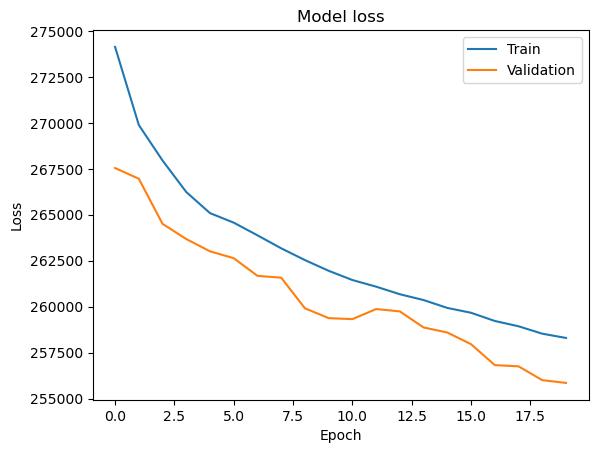

In [63]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Set plot title and labels
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Add a legend to distinguish between the curves
plt.legend(['Train', 'Validation'], loc='upper right')
# Display the plot
plt.show()


# Deployment

In [64]:
import joblib
# Save the trained model to a .pkl file using joblib
joblib.dump(best_rf, 'best_rf.pkl')

['best_rf.pkl']

# The End